In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
# sigmoid function
def sigmoid(X, weight,b):
    z = np.dot(X, weight)+b
    return 1 / (1 + np.exp(-z))

#creating log loss function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

#creating function for weight updation
def updated_weight(alpha,w,eta,N,x,b,y):
    h=sigmoid(x,w,b)
    # $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ 
    return (((1-(eta*alpha)/N)*(w.T))+alpha*(x)*(y-h))

#creating function for intercept updation
def updated_intercept(alpha,b,w,x,y):
    h=sigmoid(x,w,b)
    # $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
    return (b + alpha*(y-h))

Optimal Weight [-0.40819512  0.18608803 -0.13873193  0.33720386 -0.19058573  0.55321631
 -0.44625706 -0.09550674  0.20929646  0.16027648  0.18715532  0.00822064
 -0.0701101   0.33795986  0.0206259 ]
----------------------------------------

Optimal intercept -0.7613483856830058
----------------------------------------


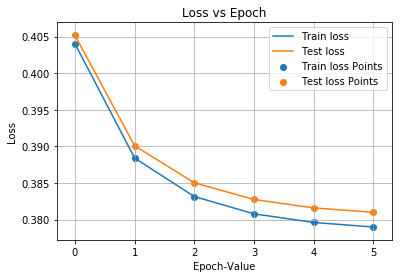

0.9617866666666667
0.95952


In [47]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own
import matplotlib.pyplot as plt

# Intializing weight,intercept, alpha,eta term
w = np.zeros_like(X_train[0])
b = 0
eta  = 0.0001
alpha = 0.0001

#calculating length of X_train
N = len(X_train)

#creating empty array to append train_loss,test_loss and epoch value
train_loss=[]
test_loss=[]
epoch= []

#iterating over Epoch value 6
for i in range(6):
    epoch.append(i)
    
    #iterating over each data point in X_train
    for j in range(0,N):
        
        #update  and intercept after each data point
        w=updated_weight(alpha,w,eta,N,X_train[j],b,y_train[j])
        b=updated_intercept(alpha,b,w,X_train[j],y_train[j])
    
    h_train=sigmoid(X_train,w,b)
    h_test=sigmoid(X_test,w,b)
    
    #calculating train_loss and test_loss
    
    trainloss=loss(h_train,y_train)
    testloss=loss(h_test,y_test)
    
    #append calculated values to empty arrays
    
    train_loss.append(trainloss)
    test_loss.append(testloss)

print("Optimal Weight "+str(w))
print("----------------------------------------\n")
print("Optimal intercept " +str(b))
print("----------------------------------------")

plt.plot(epoch, train_loss, label='Train loss')
plt.plot(epoch, test_loss, label='Test loss')

plt.scatter(epoch, train_loss, label='Train loss Points')
plt.scatter(epoch, test_loss, label='Test loss Points')

plt.legend()
plt.xlabel("Epoch-Value")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.grid()
plt.show()

#function to calulating accuracy score
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

#calculating accuracy score for train and test

print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

In [48]:
#comparing result between sgd classifier and our calculating weight and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.0035792 ,  0.00192022,  0.0002188 ,  0.00147875, -0.00635336,
          0.0037811 ,  0.00587986, -0.00693208, -0.00607015, -0.0132411 ,
          0.00234705,  0.00378601,  0.00021991,  0.00112805,  0.00058462]]),
 array([0.00046722]))